In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import anndata as ad

In [2]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/un_integreted_data.h5ad')
adata = adata.copy()
adata

AnnData object with n_obs × n_vars = 1145418 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch', 'C_scANVI', '_prediction', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    obsm: 'X_scanvi_fix', 'X_scanvi_fix_linear', 'X_scanvi_no_fix', 'X_scvi'

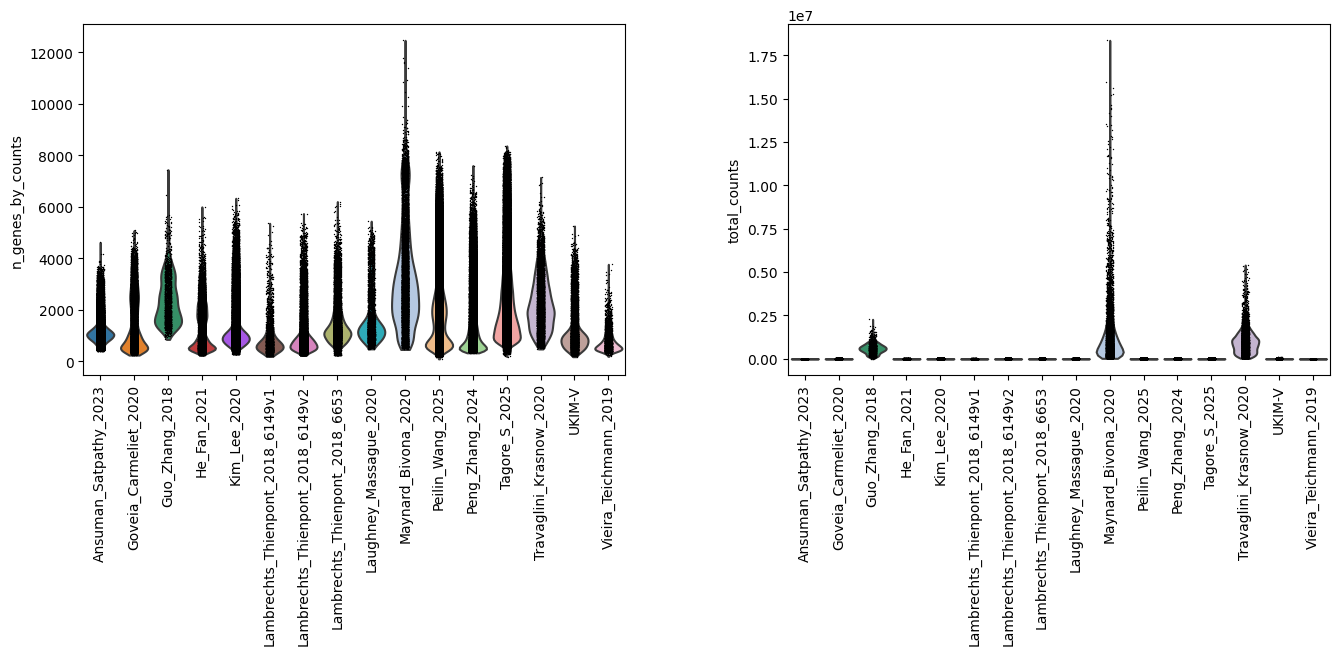

<Figure size 640x480 with 0 Axes>

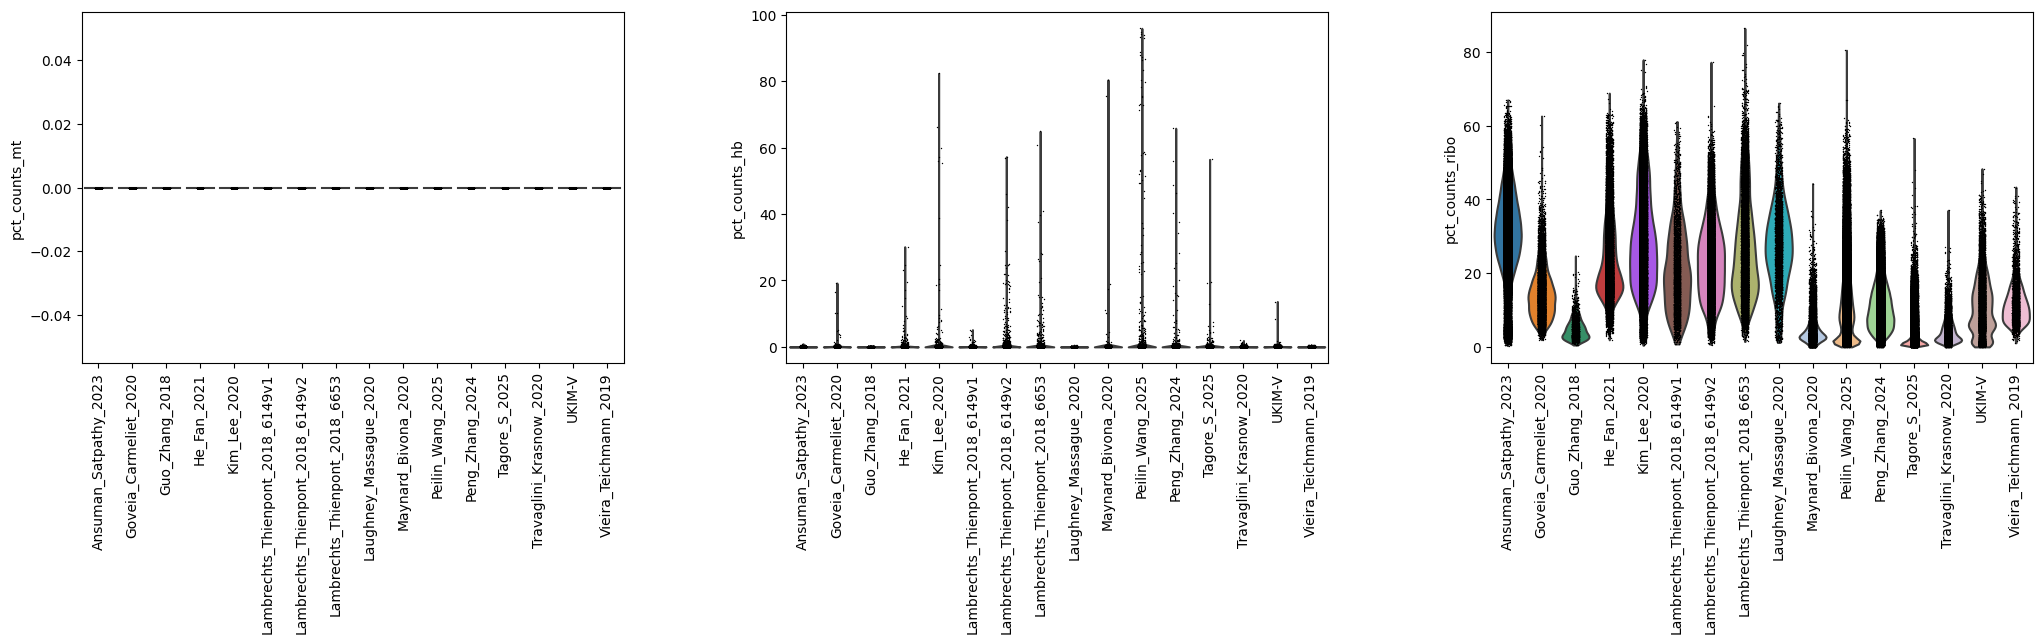

<Figure size 640x480 with 0 Axes>

In [4]:
#########QC #########
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts'], jitter=0.1,
             groupby = 'Dataset', rotation= 90)
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/beforeQC-1.pdf',dpi = 300, bbox_inches='tight')
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/beforeQC-1.png',dpi = 300, bbox_inches='tight')
sc.pl.violin(adata, ['pct_counts_mt', 'pct_counts_hb', 'pct_counts_ribo'], jitter=0.1,
             groupby = 'Dataset', rotation= 90)
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/beforeQC-2.pdf',dpi = 300, bbox_inches='tight')
plt.savefig('/home/data/sdzl14/NSCLC/zong/fig/beforeQC-2.png',dpi = 300, bbox_inches='tight')

In [3]:
#########QC #########
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
adata = adata[adata.obs['n_genes_by_counts'] <= 4000, :]
adata = adata[adata.obs['total_counts'] <= 20000, :]
adata = adata[adata.obs['pct_counts_mt'] <= 25, :]
adata = adata[adata.obs['pct_counts_hb'] <= 10, :]

adata

View of AnnData object with n_obs × n_vars = 1042919 × 16813
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch', 'C_scANVI', '_prediction', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_genes'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'
    obsm: 'X_scanvi_fix', 'X_scanvi_fix_linear', 'X_scanvi_no_fix', 'X_scvi'

/home/data/sdzl14/anaconda3/envs/myenv/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


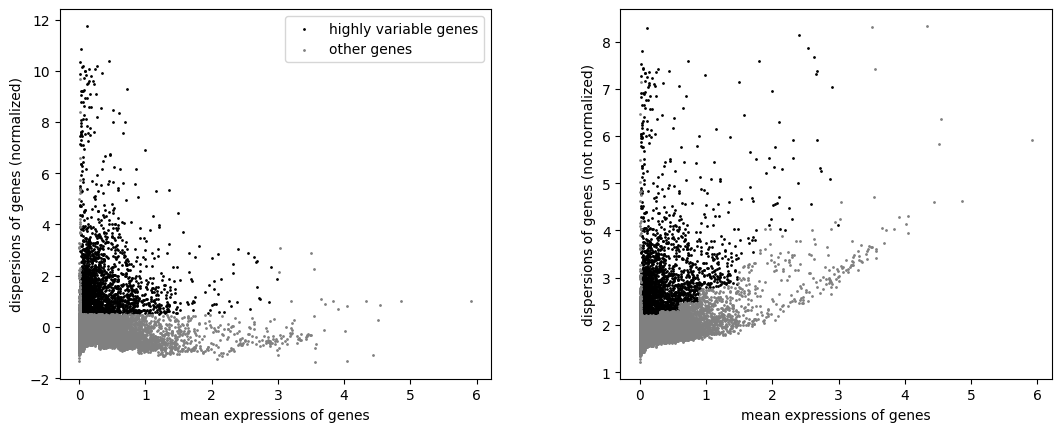

In [4]:
# 校正测序深度
sc.pp.normalize_total(adata, target_sum=1e4)
# 表达值log转化
sc.pp.log1p(adata)
# 备份完整矩阵
adata.raw = adata
# 计算高变基因
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
# 高变基因展示
sc.pl.highly_variable_genes(adata)
plt.savefig("/home/data/sdzl14/NSCLC/zong/fig/highly_variable_genes.png",dpi = 300, bbox_inches='tight')
plt.savefig("/home/data/sdzl14/NSCLC/zong/fig/highly_variable_genes.pdf",dpi = 300, bbox_inches='tight')
# 剔除技术变异的影响
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])
# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack',use_highly_variable=True)
sc.pl.pca_variance_ratio(adata, log=True)
plt.savefig("/home/data/sdzl14/NSCLC/zong/fig/pca_variance_ratio.png",dpi = 300, bbox_inches='tight')
plt.savefig("/home/data/sdzl14/NSCLC/zong/fig/pca_variance_ratio.pdf",dpi = 300, bbox_inches='tight')